In [8]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline
# To change the default values
params = {"ytick.color" : "w",
          "xtick.color" : "w",
          "axes.labelcolor" : "w",
          "axes.edgecolor" : "w"}
plt.rcParams.update(params)

import pandas as pd
import cv2

In [9]:
# Make a function that generates A,B,C with probabilities 0.3, 0.2, 0.5 respectively
def random():
    r = np.random.random()
    
    if r < 0.3:
        return 'a'
    elif 0.3 <= r < 0.5:
        return 'b'
    return 'c'



n = 100
a, b, c = 0, 0, 0

for ix in range(n):
    v = random()
    
    if v == 'a':
        a += 1
    elif v == 'b':
        b += 1
    else:
        c += 1

print float(a)/n, float(b)/n, float(c)/n

0.31 0.18 0.51


(500, 2) (500, 2)


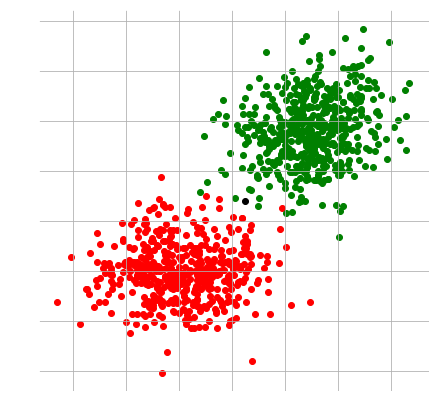

In [10]:
# MULTIVARIATE NORMAL DISTRIBUTION

# Create Mean and covariance Matrix
mean_01 = np.array([0.0,0.0])
mean_02 = np.array([5.0,7.0])

cov_01 = np.array([[2.5,0.0],[0.0,1.9]])
cov_02 = np.array([[2.0,0.5],[0.5,3.0]])


# Generate Data Distributions
data_01 = np.random.multivariate_normal(mean_01,cov_01,500)
data_02 = np.random.multivariate_normal(mean_02,cov_02,500)
print data_01.shape, data_02.shape


# Plot the data using scatter plot 
plt.figure(0,figsize=(7,7))
plt.grid("on")
plt.scatter(data_01[:,0],data_01[:,1], color='r')
plt.scatter(data_02[:,0],data_02[:,1], color='g')
plt.scatter(2.5, 3.5, color='k')
plt.show()

(1000, 2) (1000,)
0.0
(1797, 64) (1797,)
5


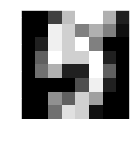

(1500, 64) (1500,)
(297, 64) (297,)
Accuracy: 94.6127946128 in time: 0:00:11.343160


In [23]:
# K-NEAREST-NEIGHBORS(KNN) Algorithm writing (without knn library)

# prepare data 
X = np.concatenate((data_01,data_02),axis=0)
y = np.zeros((X.shape[0],)) # why double brackets and blank after a comma 
y[500:] = 1

print X.shape, y.shape

# Euclidean distance function
def distance(v1,v2):
    return np.sqrt(np.sum((v1-v2)**2))

# Main KNN function
def knn(train, labels, test_x, k=5):
    
    dist = []
    
    for ix in range(train.shape[0]):
        d = distance(train[ix],test_x)
        dist.append([d, labels[ix]])
    sorted_distances = sorted(dist,key=lambda x: x[0]) #key = lambda part explain
    #Lambda is just an inline function definition
    
    candidates = np.asarray(sorted_distances)[:k,-1]
    
    freq = np.unique(candidates, return_counts=True)
    index = np.argmax(freq[1])
    
    return freq[0][index]


# Main 
x = np.array([2.1,3.2])
print knn(X,y,x)

import sklearn
from sklearn.datasets import load_digits

# loading dataset
X,y = load_digits(return_X_y=True)
print X.shape, y.shape



# plotting
n = 457
plt.figure(0, figsize=(2,2))
plt.imshow(X[n].reshape((8,8)), cmap='gray')
print y[n]
plt.show()



# dividing into training and validation
train_x = X[:1500]
train_y = y[:1500]

val_x = X[1500:]
val_y = y[1500:]

print train_x.shape, train_y.shape
print val_x.shape, val_y.shape


import datetime 
pred = []
target = []

start = datetime.datetime.now()
for ix in range(val_x.shape[0]):
    out = knn(train_x, train_y, val_x[ix], k=7)
    pred.append(out)
    target.append(val_y[ix])
    
pred = np.asarray(pred) # how asarray different from normal array
target = np.asarray(target)

stop = datetime.datetime.now()

accuracy = 100.0*(pred==target).sum() / pred.shape[0]
print "Accuracy: {} in time: {}".format(accuracy, stop-start)

In [24]:
# Doing KNN from Library of SK-LEARN

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(train_x,train_y)
pred = knn.predict(val_x)
print pred.shape
print knn.score(val_x,val_y)

(297,)
0.956228956229
